In [ ]:

### 1. Problema de usar apenas Treino e Teste
'''
Se você treinar um modelo apenas com um conjunto de treino e testar uma única vez,
pode acabar com um modelo que "decorou" os dados (overfitting) ou que teve sorte/pureza no teste.

Exemplo no Futebol:

    Se um time só joga bem entre si em coletivos de treino (conjunto de treino) e testa só uma vez contra outro time fraco (conjunto de teste),
    ele pode achar que é bom, mas na verdade só sabe jogar contra aquele nível.

    Solução:
      Usar validação cruzada (como um torneio com vários jogos contra times diferentes) para garantir que o desempenho é consistente.
'''

In [ ]:
### 2. Métricas de Desempenho
'''
São formas de medir se o modelo está indo bem.

  Exemplo no Basquete:

Precisão (Accuracy): Quantos arremessos você acertou no total.
    Se você acertou 8 de 10 cestas → Precisão = 80%.
Precisão (Precision): Dos arremessos que você disse que ia acertar, quantos realmente entram?
    Se você falou "vou acertar 5" e acertou 4 → Precisão = 80%.
Recall (Revocação): Dos arremessos que deveriam entrar, quantos você acertou?
    Se eram 6 cestas fáceis e você acertou 4 → Recall = 66,6%.

'''

In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# 1 = Defesa, 0 = Gol
y_previsto = [0, 1, 1, 1, 0, 1, 0, 0, 1, 1]
y_real =     [0, 0, 1, 0, 1, 1, 0, 0, 1, 1]

# Métricas
accuracy = accuracy_score(y_real, y_previsto)
precision = precision_score(y_real, y_previsto)
recall = recall_score(y_real, y_previsto)

print(f"\nAcurácia (precisão total): {accuracy:.2f}")
print(f"Precisão (dos que o goleiro disse que ia defender, quantos defendeu): {precision:.2f}")
print(f"Recall (das defesas reais, quantas ele previu corretamente): {recall:.2f}")



Acurácia (precisão total): 0.70
Precisão (dos que o goleiro disse que ia defender, quantos defendeu): 0.67
Recall (das defesas reais, quantas ele previu corretamente): 0.80


In [ ]:
### Matriz de Confusão
'''
A matriz mostra:

Termo	Significado	Valor
TP (True Positive) = 4 (índices 2, 5, 8, 9)       Previu defesa e realmente foi defesa
FP (False Positive) = 2 (índices 1, 3)            Previu defesa, mas foi gol
FN (False Negative) = 1 (índice 4)                Previu gol, mas foi defesa
TN (True Negative) = 3 (índices 0, 6, 7)          Previu gol e realmente foi gol

  Total	TP + TN + FP + FN	= 10 (número total de pênaltis)



Acurácia = (TP + TN) / Total = (4 + 3) / 10 = 7 / 10 = 0.7
Precisão = TP / (TP + FP) = 4 / (4 + 2) = 4 / 6 = 0.6667
Recall = TP / (TP + FN) = 4 / (4 + 1) = 4 / 5 = 0.8

 | TN | FP |
 | FN | TP |
'''

In [ ]:
# Matriz de confusão
matriz = confusion_matrix(y_real, y_previsto)
print("Matriz de Confusão:")
print(matriz)

In [ ]:
'''
Concluímos:
    Onde o jogador está errando nas previsões,
    O trade-off entre ser muito otimista (FP) ou muito pessimista (FN),
    Aprimorar critérios para escolher goleiros numa decisão de pênaltis,
    Por que precision e recall são diferentes da accuracy
'''

In [ ]:
### Log Loss

'''
O Log Loss penaliza mais fortemente previsões com alta confiança e erradas.
Por exemplo, se o modelo disser 99% de chance de defesa (probabilidade de 0.99),
e o goleiro realmente levar o gol (y_true = 0), o Log Loss será alto.

Se o modelo disser 50% de chance (probabilidade de 0.5), ele penaliza menos.
Log Loss mede a confiança do goleiro nas previsões. Quanto menor, melhor.

  Exemplo:
      Se o goleiro sempre diz 90% de chance de defesa e erra, o Log Loss será alto.
      Se ele diz 50%, o Log Loss será menor.
'''

'\nO Log Loss penaliza mais fortemente previsões com alta confiança e erradas. \nPor exemplo, se o modelo disser 99% de chance de defesa (probabilidade de 0.99),\ne o goleiro realmente levar o gol (y_true = 0), o Log Loss será alto. \n\nSe o modelo disser 50% de chance (probabilidade de 0.5), ele penaliza menos.\nLog Loss mede a confiança do goleiro nas previsões. Quanto menor, melhor.\n  \n  Exemplo:\n      Se o goleiro sempre diz 90% de chance de defesa e erra, o Log Loss será alto.\n      Se ele diz 50%, o Log Loss será menor.\n'

In [ ]:
from sklearn.metrics import log_loss

# y_true: Realidade (0 = gol, 1 = erro do chute/defesa)
y_real = [0, 0, 1, 0, 1, 1, 0, 0, 1, 1]

# y_pred: Probabilidades previstas pelo modelo (entre 0 e 1)
y_pred = [0.2, 0.6, 0.9, 0.1, 0.3, 0.85, 0.2, 0.1, 0.95, 0.8]  # Probabilidades de defesa

# Calculando o Log Loss
loss = log_loss(y_real, y_pred)

print(f"Log Loss: {loss:.4f}")

Log Loss: 0.3320


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_pred, label='Probabilidade Prevista (Defesa)', color='orange')
plt.plot(y_real, label='Valor Real (0 = Gol, 1 = Defesa)', marker='o')

# Destacar acertos e erros
for i in range(len(y_real)):
    cor = 'green' if round(y_pred[i]) == y_real[i] else 'red'
    plt.scatter(i, y_pred[i], color=cor, s=100, edgecolors='black')


# Título e legendas
plt.title(f'Previsões x Realidade (Log Loss: {loss:.4f})')
plt.xlabel('Pênalti')
plt.ylabel('Probabilidade de Defesa')
plt.legend()
plt.grid(True)
plt.ylim(-0.1, 1.1)
plt.xlim(-0.5, 9.5)


# Ajustar legenda para não ficar sobre os dados
plt.legend(handles=[
    plt.Line2D([], [], marker='o', linestyle='-', label='Probabilidade Prevista'),
    plt.Line2D([], [], color='orange', linestyle='-', label='Valor Real')
], loc='upper left', bbox_to_anchor=(1, 1))  # legenda fora do gráfico

plt.show()

In [ ]:
from sklearn.metrics import log_loss

# y_true: Realidade (0 = gol, 1 = defesa)
y_real = [0, 1, 0, 1, 0, 1, 1, 0, 1, 0]

# y_pred: Probabilidades previstas pelo modelo (valores com alta confiança e erradas)
y_pred = [0.9, 0.1, 0.95, 0.05, 0.9, 0.1, 0.99, 0.1, 0.8, 0.2]  # Alta confiança e erradas

# Calculando o Log Loss
loss = log_loss(y_real, y_pred)

print(f"Log Loss: {loss:.4f}")

Log Loss: 1.5764


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Dados
y_real = [0, 1, 0, 1, 0, 1, 1, 0, 1, 0]
y_pred = [0.9, 0.1, 0.95, 0.05, 0.9, 0.1, 0.99, 0.1, 0.8, 0.2]

# Calcular Log Loss
loss = log_loss(y_real, y_pred)

# Plotando os resultados
plt.figure(figsize=(10, 5))

# Plot da linha de probabilidades previstas
plt.plot(y_pred, label='Probabilidade Prevista (Defesa)', marker='o', linestyle='-')

# Plot da linha de valores reais (0 = Gol, 1 = Defesa)
plt.plot(y_real, label='Valor Real (0 = Gol, 1 = Defesa)', marker='x', linestyle='-', color='orange')

# Destacar acertos e erros
for i in range(len(y_real)):
    # Se a previsão está errada e com alta confiança
    if round(y_pred[i]) != y_real[i]:  # Erro
        plt.scatter(i, y_pred[i], color='red', s=100, edgecolors='black', zorder=3)
    else:  # Acerto
        plt.scatter(i, y_pred[i], color='green', s=100, edgecolors='black', zorder=3)

# Título e legendas
plt.title(f'Previsões com Alta Confiança e Erros (Log Loss: {loss:.4f})')
plt.xlabel('Pênalti')
plt.ylabel('Probabilidade de Defesa')
plt.xticks(range(len(y_real)))
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True)


# Ajustar legenda para não ficar sobre os dados
plt.legend(handles=[
    plt.Line2D([], [], marker='o', linestyle='-', label='Probabilidade Prevista'),
    plt.Line2D([], [], marker='x', color='orange', linestyle='-', label='Valor Real')
], loc='upper left', bbox_to_anchor=(1, 1))  # legenda fora do gráfico


# Exibindo o gráfico
plt.show()


In [ ]:
### Log Loss mede a confiança do goleiro nas previsões. Quanto menor, melhor.

'''
Exemplo:
    Se o goleiro sempre diz 90% de chance de defesa e erra, o Log Loss será alto.
    Se ele diz 50%, o Log Loss será menor.
'''

###   Por que isso é Melhor?
'''
Mais realista:
    Goleiros não defendem aleatoriamente — eles antecipam cantos.
Penaliza erros estratégicos:
    Se o goleiro sempre cai para um lado, mas o cobrador varia, o Log Loss aumenta.
Pode ser usado para treinar modelos que preveem o canto do chute (ex: Redes Neurais).
'''
###   Aplicação Prática
'''
Scouting de Cobradores:
    Se um jogador sempre chuta no esq. baixo, um modelo com Log Loss baixo detectará isso.
Treino de Goleiros:
    Simulações com Log Loss ajudam a melhorar a antecipação.
'''

'\nScouting de Cobradores: \n    Se um jogador sempre chuta no esq. baixo, um modelo com Log Loss baixo detectará isso.\nTreino de Goleiros: \n    Simulações com Log Loss ajudam a melhorar a antecipação.\n'

In [ ]:
### Feature Scalling

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Dataset exemplo
df = pd.DataFrame({
    'idade': [18, 25, 40, 60],
    'renda': [1200, 3500, 5000, 8000]
})

# Min-Max Scaling
minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(df)

# Standardization
standard = StandardScaler()
df_standard = standard.fit_transform(df)

print("Min-Max:\n", df_minmax)
print("Standard:\n", df_standard)



Min-Max:
 [[0.         0.        ]
 [0.16666667 0.33823529]
 [0.52380952 0.55882353]
 [1.         1.        ]]
Standard:
 [[-1.10253232 -1.30663482]
 [-0.66773084 -0.37477123]
 [ 0.26398661  0.2329659 ]
 [ 1.50627656  1.44844015]]


In [2]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Dados dos jogadores de zagueiro (incluindo gols)
dados = {
    'Jogador': ['Jogador 1', 'Jogador 2', 'Jogador 3', 'Jogador 4', 'Jogador 5'],
    'Desarmes':           [12, 18, 20, 15, 10],
    'Faltas':             [4, 5, 3, 3, 5],
    'Força (kg)':         [80, 85, 90, 75, 78],
    'Velocidade (km/h)':  [30, 28, 32, 27, 29],
    'Gols Marcados':      [5, 3, 2, 6, 1]
}

df = pd.DataFrame(dados)

# Criando o objeto de escalonamento MinMaxScaler
scaler = MinMaxScaler()

# Aplicando o scaling nas colunas que queremos normalizar
dados_normalizados = scaler.fit_transform(df[['Desarmes', 'Faltas', 'Força (kg)', 'Velocidade (km/h)', 'Gols Marcados']])

# Transformando o array resultante em um DataFrame
df_normalizado = pd.DataFrame(dados_normalizados, columns=['Desarmes', 'Faltas', 'Força (kg)', 'Velocidade (km/h)', 'Gols Marcados'])

# Adicionando a coluna 'Jogador' de volta ao DataFrame
df_normalizado.insert(0, 'Jogador', df['Jogador'])

# Exibindo os dados normalizados
print(df_normalizado)


     Jogador  Desarmes  Faltas  Força (kg)  Velocidade (km/h)  Gols Marcados
0  Jogador 1       0.2     0.5    0.333333                0.6            0.8
1  Jogador 2       0.8     1.0    0.666667                0.2            0.4
2  Jogador 3       1.0     0.0    1.000000                1.0            0.2
3  Jogador 4       0.5     0.0    0.000000                0.0            1.0
4  Jogador 5       0.0     1.0    0.200000                0.4            0.0


<Figure size 1000x600 with 0 Axes>

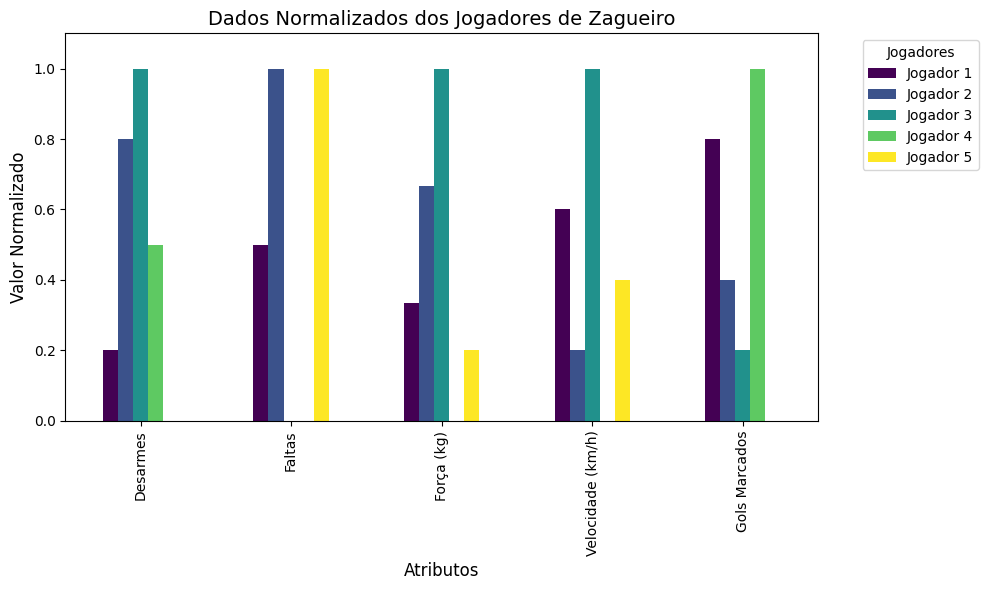

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando o objeto de escalonamento MinMaxScaler
scaler = MinMaxScaler()

# Aplicando o scaling nas colunas que queremos normalizar
dados_normalizados = scaler.fit_transform(df[['Desarmes', 'Faltas', 'Força (kg)', 'Velocidade (km/h)', 'Gols Marcados']])

# Transformando o array resultante em um DataFrame
df_normalizado = pd.DataFrame(dados_normalizados, columns=['Desarmes', 'Faltas', 'Força (kg)', 'Velocidade (km/h)', 'Gols Marcados'])

# Adicionando a coluna 'Jogador' de volta ao DataFrame na primeira posição
df_normalizado['Jogador'] = df['Jogador']

# Plotando os dados normalizados com 'Jogador' no eixo Y
plt.figure(figsize=(10, 6))

# Utilizando o Seaborn para criar um gráfico de barras
ax = df_normalizado.set_index('Jogador').T.plot(kind='bar', figsize=(10, 6), cmap='viridis')

# Customizando o gráfico
plt.title('Dados Normalizados dos Jogadores de Zagueiro', fontsize=14)
plt.xlabel('Atributos', fontsize=12)
plt.ylabel('Valor Normalizado', fontsize=12)

# Movendo a legenda para o lado direito
plt.legend(title='Jogadores', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylim(0, 1.1)  # Correto - define o limite inferior como -1

# Exibindo o gráfico
plt.tight_layout()
plt.show()
